# Labolatorium 2

importowanie bibliotek

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("bright")

# Zadanie 1

Przygotuj program generujący następujące zbiory punktów na płaszczyźnie
(współrzędne rzeczywiste typu double):

a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału
[-100, 100],

b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku
(0,0) i promieniu R=10,

c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta
o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),

d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty
wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach
kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

### Podpunkt A

In [2]:
points_a = np.random.uniform(-100, 100, size =[100, 2])
table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
print(table_a)

            X          Y
0   77.003024  17.001776
1   45.871000  13.101038
2  -45.138180 -41.706204
3   78.031571  80.377065
4   80.132363  15.111668
..        ...        ...
95  72.209404 -27.107399
96   4.603180  71.511769
97  17.657839   4.093847
98  72.580027  83.581629
99  61.484466 -62.807839

[100 rows x 2 columns]


### Podpunkt B

In [3]:
points_b=[None for _ in range(100)]
for i in range(100):
    angle=np.random.uniform(0,2*np.pi)
    x=np.cos(angle)*10
    y=np.sin(angle)*10
    points_b[i]=(x,y)
table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
print(table_b)

           X         Y
0  -9.670386 -2.546300
1  -4.681048  8.836730
2  -8.693627  4.941746
3  -4.530059 -8.915075
4  -7.765677 -6.300338
..       ...       ...
95 -7.948147 -6.068522
96  9.440168 -3.298975
97 -5.085404 -8.610381
98  5.575507 -8.301429
99 -9.919503 -1.266280

[100 rows x 2 columns]


### Podpunkt C

In [4]:
points_c=[[None,None] for _ in range(100)]
tens=[-10,10]
for i in range(100):
    # (0,2) ponieważ losuje liczbe całkowitą z przedziału 0 ≤ x < 2
    index_1=np.random.randint(0,2)
    index_2=np.random.randint(0,2)
    
    points_c[i][index_1]=tens[index_2]
    points_c[i][1-index_1]=np.random.uniform(-10,10)
    
    #pętla while zapobiega powstaniu punktów na krawędziach kwadratu
    while (points_c[i][0]==10 or points_c[i][0]==-10) and (points_c[i][1]==10 or points_c[i][1]==-10):
        index_1=np.random.randint(0,2)
        index_2=np.random.randint(0,2)
        points_c[i][index_1]=tens[index_2]
        points_c[i][1-index_1]=np.random.uniform(-10,10)
        
table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
print(table_c)

            X          Y
0   -3.089437  10.000000
1   10.000000  -6.220516
2   10.000000  -9.536663
3  -10.000000  -5.013545
4  -10.000000  -4.877881
..        ...        ...
95  -6.700942 -10.000000
96 -10.000000  -1.411482
97  -3.819088  10.000000
98 -10.000000  -3.596760
99  -9.375577 -10.000000

[100 rows x 2 columns]


### Podpunkt D

In [5]:
points_d=[ [None, None] for _ in range(94)]
for i in range(2):
    for j in range(25):
        points_d[(i*25)+j][i]=0
        points_d[(i*25)+j][1-i]=np.random.uniform(0,10)
for i in range(20):
    point=np.random.uniform(0,10)
    points_d[50+i][0]=point
    points_d[50+i][1]=point
    
    x=np.random.uniform(0,10)
    y=-x+10
    points_d[70+i][0]=x
    points_d[70+i][1]=y
    
points_d[90]=[0,0]
points_d[91]=[10,0]
points_d[92]=[10,10]
points_d[93]=[0,10]

table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
print(table_d)

            X          Y
0    0.000000   1.077696
1    0.000000   6.884499
2    0.000000   7.579912
3    0.000000   9.101368
4    0.000000   4.196635
..        ...        ...
89   7.833636   2.166364
90   0.000000   0.000000
91  10.000000   0.000000
92  10.000000  10.000000
93   0.000000  10.000000

[94 rows x 2 columns]


# Zadanie 2

Uruchom wizualizację graficzną utworzonych zbiorów punktów.

### Zbiór punktów A

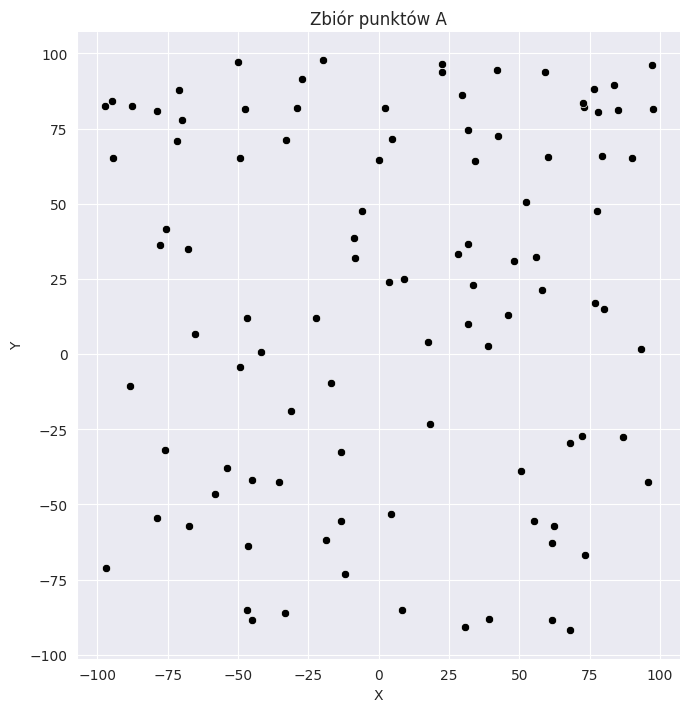

In [6]:
plot_a =sns.relplot(data=table_a ,x='X', y='Y', height=7, color="black").set(title="Zbiór punktów A")

### Zbiór punktów B

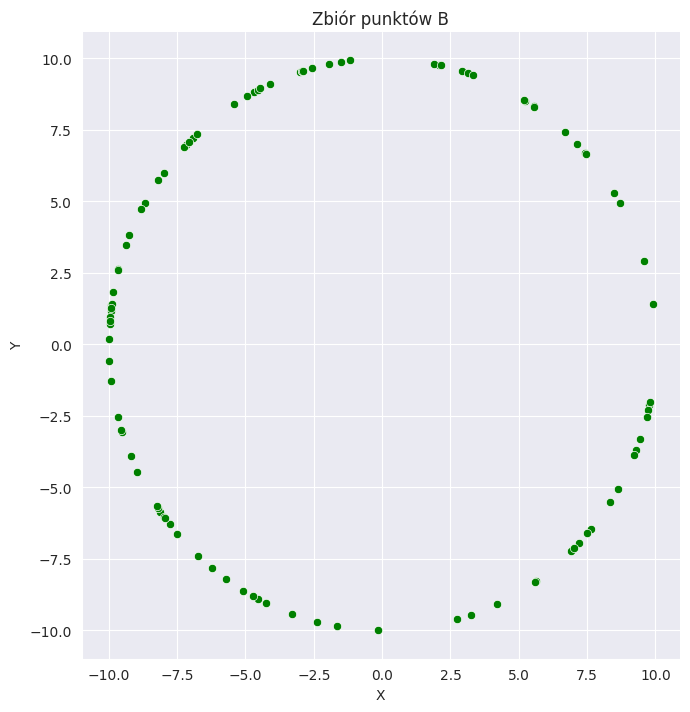

In [7]:
plot_b=sns.relplot(data=table_b, x='X', y='Y', height=7, color="green").set(title="Zbiór punktów B")

### Zbiór punktów C

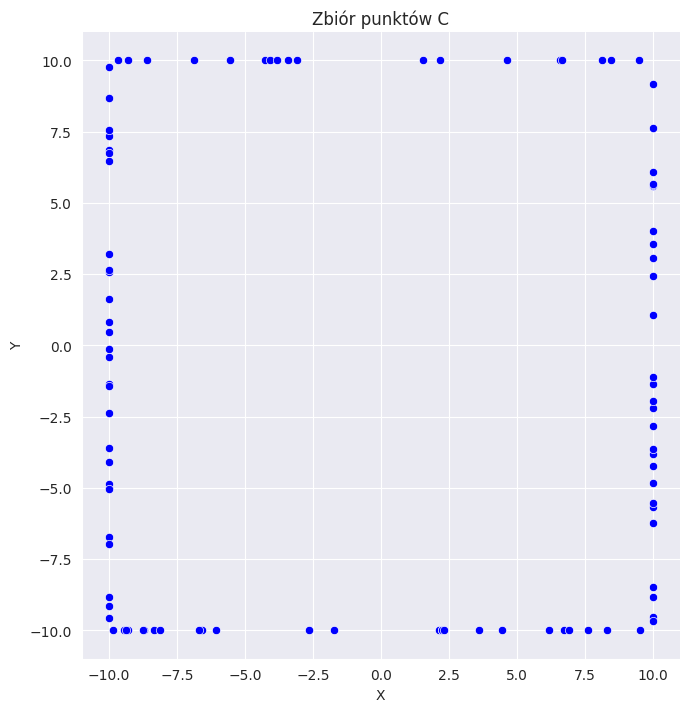

In [8]:
plot_c=sns.relplot(data=table_c, x='X', y='Y', height=7, color="blue").set(title="Zbiór punktów C")

### Zbiór punktów D

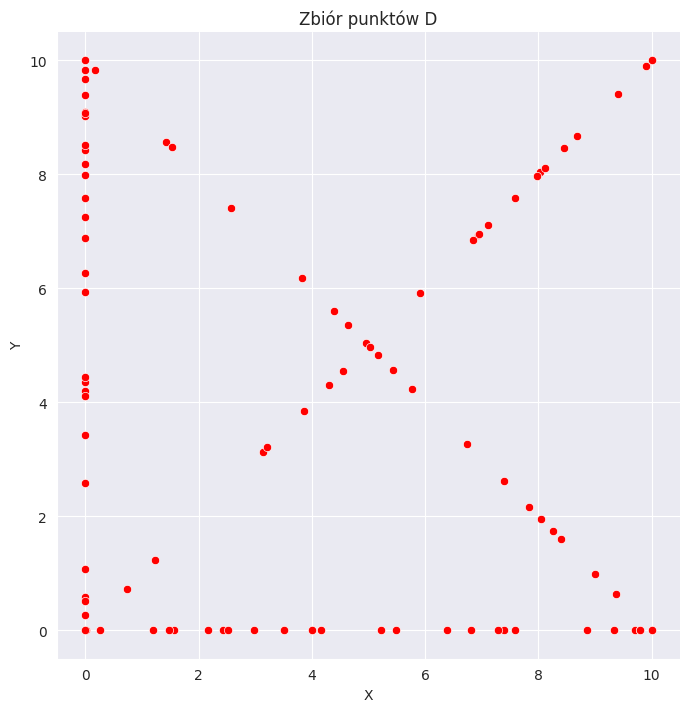

In [9]:
plot_c=sns.relplot(data=table_d, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 3

Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych
parametrów dla schematów losowania punktów podanych powyżej:

a) liczba punktów, przedziały dla współrzędnych,

b) liczba punktów, środek i promień okręgu,

c) liczba punktów, wierzchołki prostokąta,

d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

## a)

In [10]:
def setA(number_of_points, begin,end):
    points_a = np.random.uniform(begin, end, size =[number_of_points, 2])
    table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
    return table_a

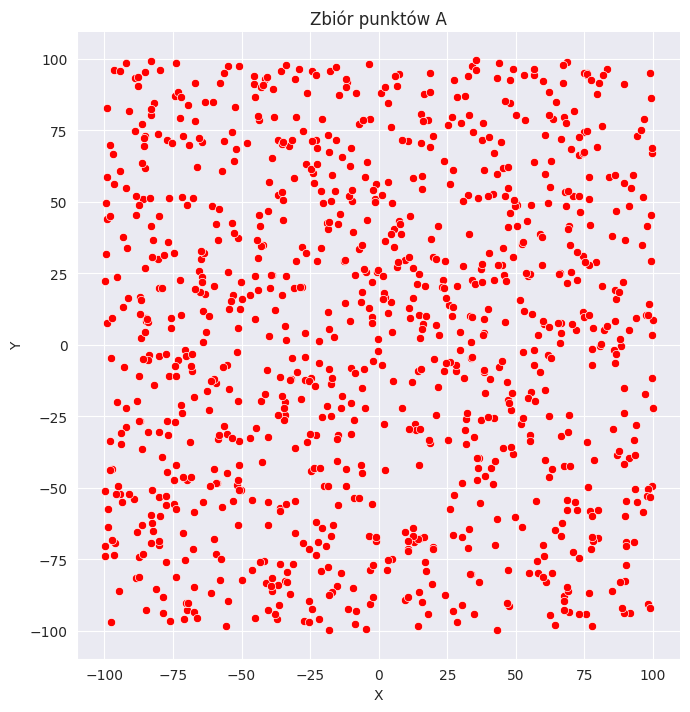

In [11]:
table=setA(1000,-100,100)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów A")

## b)

In [12]:
def setB(number_of_points, center, radius):
    points_b=[None for _ in range(number_of_points)]
    for i in range(number_of_points):
        angle=np.random.uniform(0,2*np.pi)
        x=np.cos(angle)*radius + center[0]
        y=np.sin(angle)*radius + center[1]
        points_b[i]=(x,y)
    table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
    return table_b

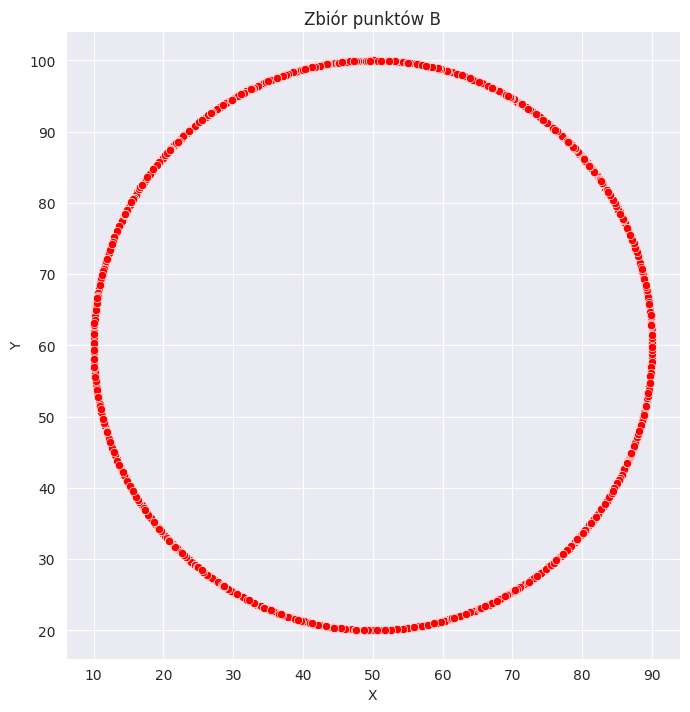

In [13]:
table=setB(10000,(50,60),40)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów B")

## c)

In [14]:
def setC(number_of_points, lowerLeft, upperRight):
    points_c=[[None,None] for _ in range(number_of_points)]
    xL=lowerLeft[0]
    xR=upperRight[0]
    yL=lowerLeft[1]
    yR=upperRight[1]
    
    for i in range(number_of_points):
        n = np.random.randint(0,4)
        if n==0:
            points_c[i][0]=xL
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
        elif n==1:
            points_c[i][0]=xR
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
            
        elif n==2:
            points_c[i][1]=yL
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)
            
            
        else:
            points_c[i][1]=yR
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)

    table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
    return table_c

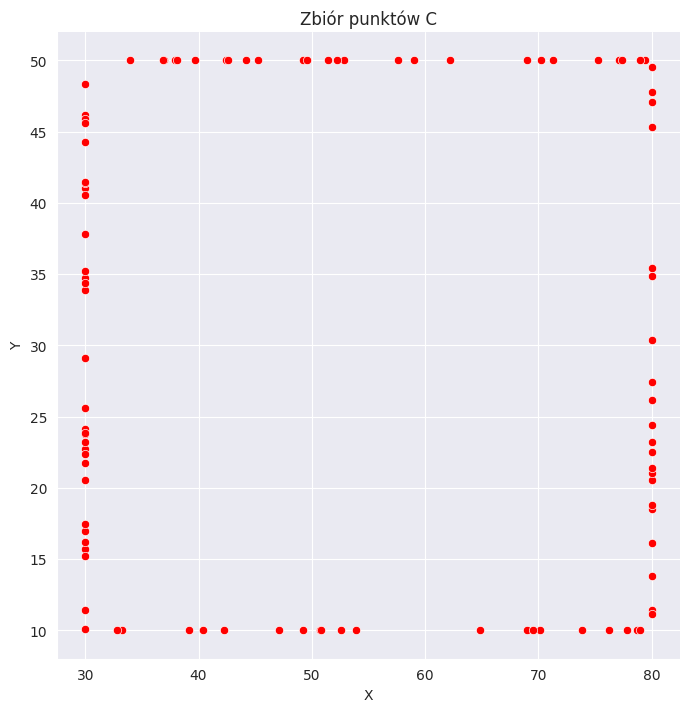

In [15]:
table=setC(100, (30,10), (80,50))
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów C")

## d)

In [16]:
# lewym dolnym wierzchołkiem jest zawsze punkt (0,0)
def setD(upperRight, axis, borders):
    points_d=[ [None, None] for _ in range(axis+borders+4)]
    
    for j in range(axis):
        n=np.random.randint(0,2)
        if n==0:
            points_d[j][0]=0
            points_d[j][1]=np.random.uniform(0,upperRight[1])       
        elif n==1:
            points_d[j][n]=0
            points_d[j][1-n]=np.random.uniform(0,upperRight[0])
    
    for j in range(axis, axis+borders):
        n=np.random.randint(0,2)
        x=np.random.uniform(0,upperRight[0])
        if n==0:
            points_d[j][0]=x
            points_d[j][1]=x       
        elif n==1:
            points_d[j][0]=x
            points_d[j][1]=-x+upperRight[1]

    points_d[axis+borders]=[0,0]
    points_d[axis+borders+1]=[upperRight[0],0]
    points_d[axis+borders+2]=[upperRight[0],upperRight[1]]
    points_d[axis+borders+3]=[0,upperRight[1]]

    table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
    return table_d

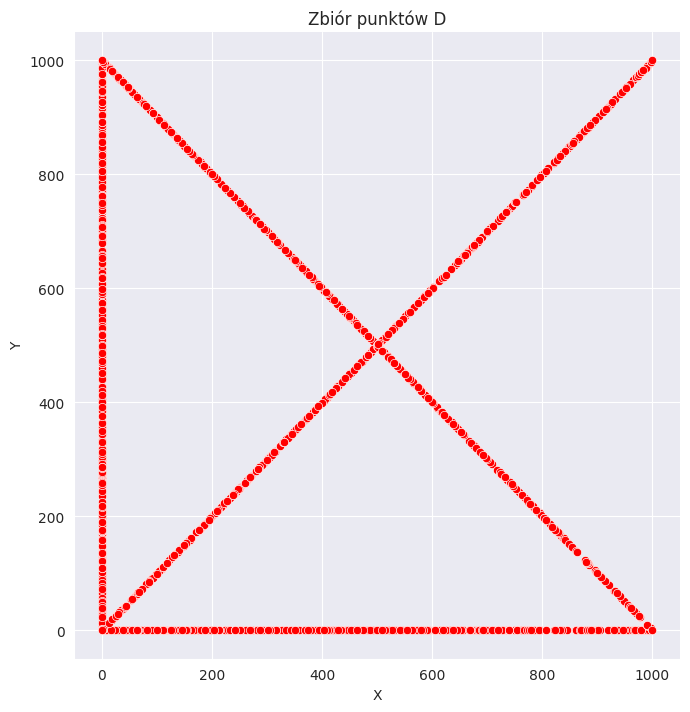

In [17]:
table=setD((1000,1000), 1000, 1000)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 4

Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla
zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz
zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w
pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość
sprawdzenia czasu działania algorytmu.

In [73]:
def makeplot(points, ch):
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    x_ch=ch[0]
    y_ch=ch[1]
    plt.plot(x_ch, y_ch, '-o', color='red')

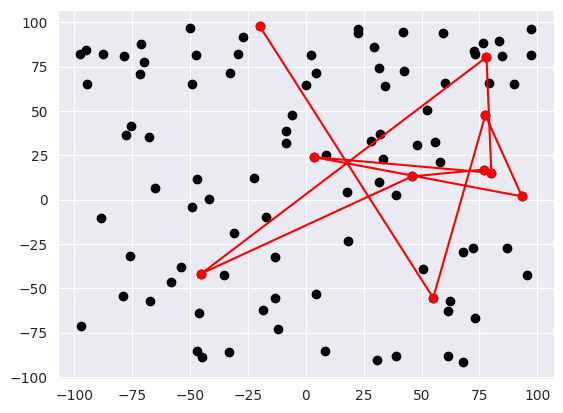

In [74]:
makeplot(table_a , ch_points )

Funkcje pomocniczne:

In [ ]:
def det_2x2()